In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [29]:
import numpy as np

# tasks

## Q1
Q1. Given dataset — predict salary from years of experience.

|YearsExperience|Salary (thousands)|
|---|---|
|1.1|39.0|
|1.3|46.0|
|1.5|47.0|
|2.0|52.0|
|2.2|56.0|
|2.9|64.0|
|3.0|65.0|
|3.2|67.0|
|3.2|68.0|
|3.7|70.0|

Fit a simple linear regression model (Salary ~ YearsExperience).
Report the estimated intercept and slope.
Predict the salary (in thousands) for someone with 4.5 years of experience.
Compute and interpret the R² value.

>[!Note] Use both methods using scratch and scikit learn



In [ ]:
df = {
    "x1": [1.1 ,1.3 ,1.5 ,2.0 ,2.2 ,2.9 ,3.0 ,3.2 ,3.2 ,3.7],
    "x2": [39.0,46.0,47.0,52.0,56.0,64.0,65.0,67.0,68.0,70.0]
}

df = pd.DataFrame(df)

print(df)

### scikit learn



Slope:  [11.83869676]
Intercept:  28.868740819869146


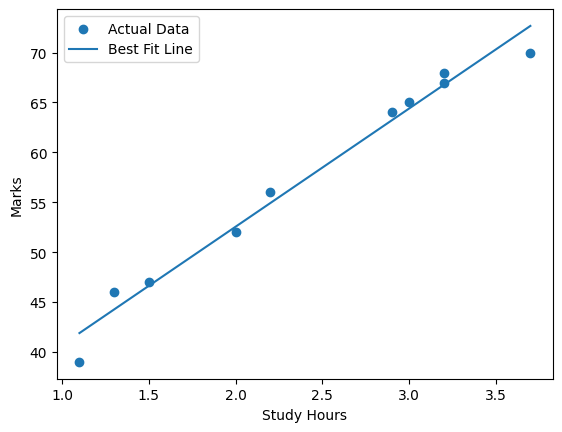

In [ ]:
from sklearn.linear_model import LinearRegression



model = LinearRegression()


x1 = df['x1'].values.reshape(-1,1) # converts a list of size m to matrix(mx1)
x2 = df['x2'].values


model.fit(x1,x2)

pred = model.predict(x1)

print("Slope: ", model.coef_)
print("Intercept: ", model.intercept_)

# Plot
plt.scatter(x1, x2, label="Actual Data")
plt.plot(x1, pred, label="Best Fit Line")
plt.xlabel("Study Hours")
plt.ylabel("Marks")
plt.legend()
plt.show()


### from OLS



$$
\textbf{w} = (\textbf{X}^T\textbf{X})^{-1}\textbf{X}^T\textbf{y}
$$

In [76]:
X = np.array(df['x1']).reshape(-1,1) # this X being converted from a list to a X_(mx1) matrix
print(X.shape)
y = np.array(df['x2'])
print(y.shape)

# convert X mxn to X mxn+1
col_of_ones = np.ones((len(X),1))

X_b = np.c_[col_of_ones,X]
print(X_b)


(10, 1)
(10,)
[[1.  1.1]
 [1.  1.3]
 [1.  1.5]
 [1.  2. ]
 [1.  2.2]
 [1.  2.9]
 [1.  3. ]
 [1.  3.2]
 [1.  3.2]
 [1.  3.7]]


for $$\textbf{w} = (\textbf{X}^T\textbf{X})^{-1}\textbf{X}^T\textbf{y}$$

In [77]:
trans_mult = X_b.T@X_b

inv = np.linalg.inv(trans_mult)

w = inv@X_b.T@y
print(w)



[28.86874082 11.83869676]


[[1.1 1.3 1.5 2.  2.2 2.9 3.  3.2 3.2 3.7]]
[41.89130725 44.2590466  46.62678595 52.54613433 54.91387368 63.20096141
 64.38483109 66.75257044 66.75257044 72.67191881]


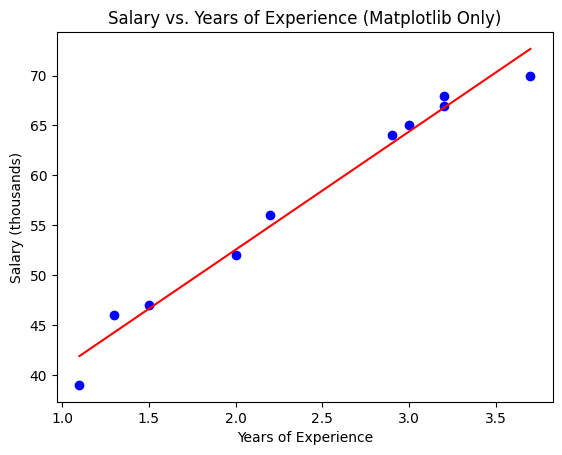

In [79]:

y_p = X_b@w
print(X.T)
print(y_p)

plt.scatter(x=X,y=y,color='blue')
plt.plot(X,y_p,color='red')
plt.title('Salary vs. Years of Experience (Matplotlib Only)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary (thousands)')


plt.show()

## Q2
Download the dataset "Smartphone Usage and Battery Life" from Kaggle (or simulate your own): 
- assume it has features like `Average Screen-On Time per Day (hrs)` and `Battery Life (hours before recharge)`. Fit a model to predict battery life from screen-on time. Investigate if there's a significant negative correlation.

0     2.5
1     4.0
2     1.5
3     7.0
4     5.5
5     3.0
6     8.0
7     1.0
8     4.5
9     6.5
10    2.0
11    5.0
12    7.5
13    3.5
14    6.0
Name: time, dtype: float64


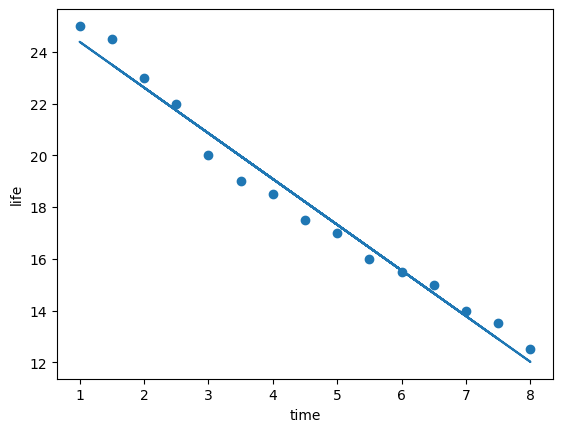

In [ ]:
# Sample,Avg. Screen-On Time (X),Battery Life (y)

# data definition
# ------------------------
df  = {
    "time": [2.5,4.0,1.5,7.0,5.5,3.0,8.0,1.0,4.5,6.5,2.0,5.0,7.5,3.5,6.0],
    "life": [22.0,18.5,24.5,14.0,16.0,20.0,12.5,25.0,17.5,15.0,23.0,17.0,13.5,19.0,15.5]
}
df = pd.DataFrame(df)


X = np.array(df['time']).reshape(-1,1)

y = np.array(df['life'])
# ------------------------

# plot data
# ------------------------
plt.scatter(X,y)
plt.xlabel("time")
plt.ylabel("life")
# ------------------------
# convert X mxn to X mxn+1
X = np.c_[np.ones((len(X),1)),X]


# ------------------------
# perform OLS
w = np.linalg.inv(X.T@X)@X.T@y
y_p = X@w
# ------------------------



plt.plot(df.iloc[:,0],y_p)


## Q3
*Given dataset — predict weight from height*

| Height (cm) | Weight (kg) |
| ----------- | ----------- |
| 150         | 50          |
| 155         | 55          |
| 160         | 60          |
| 165         | 63          |
| 170         | 68          |
| 175         | 72          |
| 180         | 75          |

- Build a linear regression model (Weight ~ Height).
- Plot data points and the regression line.
- Predict the weight of a person whose height is 172 cm.
- Check residuals and comment whether linear assumptions seem reasonable.


weight:
69.1357142857142


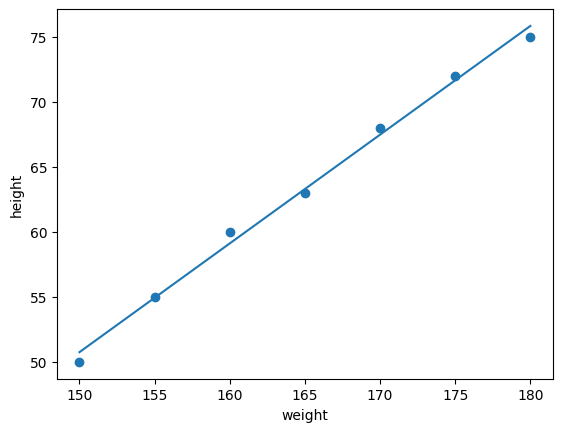

In [119]:
df = {
    "weight": [50,55,60,63,68,72,75],
    "height": [150,155,160,165,170,175,180]
}
df = pd.DataFrame(df)



X = np.array(df['height']).reshape(-1,1)

y = np.array(df['weight'])
# ------------------------

# plot data
# ------------------------
plt.scatter(X,y)
plt.xlabel("weight")
plt.ylabel("height")
# ------------------------
# convert X mxn to X mxn+1
X = np.c_[np.ones((len(X),1)),X]


# ------------------------
# perform OLS
w = np.linalg.inv(X.T@X)@X.T@y
y_p = X@w
# ------------------------



plt.plot(df.iloc[:,1],y_p)

## height: 172, weight =?

print("weight:")
print(np.array([1,172])@w)


## Q4
Use the same data from `Q3`. 
- Add an extra data point: 
    - Height = 190 cm, 
    - Weight = 60 kg (a potential outlier). 
- Re-fit the regression model, compare slope, intercept, and $\mathbb{R}^2$ with and without the outlier. Discuss how the outlier affects your model.


weight:
62.19751552794999


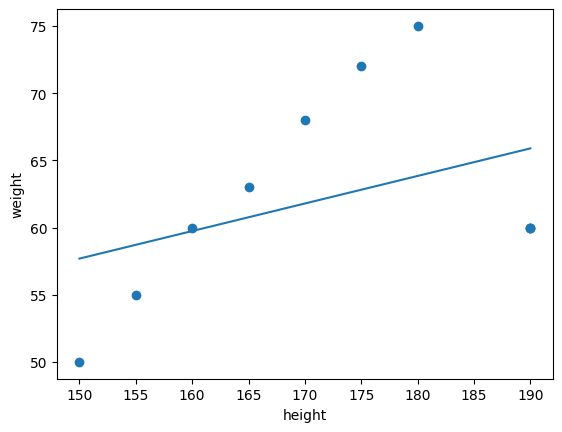

In [123]:

df.loc[len(df)] = [60,190]


X = np.array(df['height']).reshape(-1,1)

y = np.array(df['weight'])
# ------------------------

# plot data
# ------------------------
plt.scatter(X,y)
plt.xlabel("height")
plt.ylabel("weight")
# ------------------------
# convert X mxn to X mxn+1
X = np.c_[np.ones((len(X),1)),X]


# ------------------------
# perform OLS
w = np.linalg.inv(X.T@X)@X.T@y
y_p = X@w
# ------------------------



plt.plot(df.iloc[:,1],y_p)

## height: 172, weight =?

print("weight:")
print(np.array([1,172])@w)


## Q5
Classification with real dataset — Survive or not?
Download the [classic Titanic - Machine Learning from Disaster dataset](https://www.kaggle.com/c/titanic/data)
- Use features like `Pclass`, `Sex`, `Age`, `Fare` to build a decision tree classifier predicting `Survived`.
- Report accuracy, precision,
- Visualize the decision tree and interpret the top splits.


C:\Users\LENOVO L14\AppData\Local\Temp\ipykernel_20248\3721030735.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\LENOVO L14\AppData\Local\Temp\ipykernel_20248\3721030735.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

Accuracy:  0.7758
Precision: 0.8679


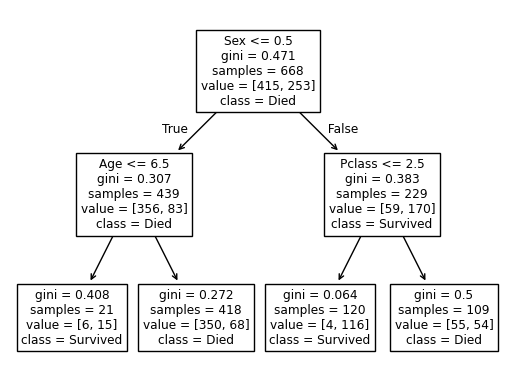

In [147]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)


df['Sex'] = df['Sex'].map({'male':0,'female':1})
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)



X = df[['Pclass','Sex','Age','Fare']] # features
y = df['Survived'] # output


# ---
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# ---
from sklearn.tree import DecisionTreeClassifier, plot_tree
tree = DecisionTreeClassifier(max_depth=2, random_state=42)
tree.fit(X_train, y_train)
# ---

plot_tree(tree,feature_names=['Pclass','Sex','Age','Fare'], class_names=['Died', 'Survived'],) # Optional: for better class labels)


from sklearn.metrics import accuracy_score,precision_score
# now train a model to predict the data, to test accuracy
y_p = tree.predict(X_test)

accuracy = accuracy_score(y_test,y_p)

precision = precision_score(y_test, y_p, pos_label=1, zero_division=0)
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")

## Q6
Using Titanic dataset, handle missing values (e.g., Age) and categorical variables (e.g., Sex, Embarked). Then build a decision tree classifier. Document all preprocessing steps, and report the final accuracy. Discuss how preprocessing affected model quality.


In [161]:

# URL for the Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# --- A. Handling Missing Values ---

# 1. Impute 'Age' using the Median
df['Age'].fillna(df['Age'].median(), inplace=True)

# 2. Impute 'Embarked' using the Mode (most frequent value)
mode_embarked = df['Embarked'].mode()[0]
df['Embarked'].fillna(mode_embarked, inplace=True)

# --- B. Handling Categorical Variables ---

# 3. Label Encoding for 'Sex'
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# 4. One-Hot Encoding for 'Embarked' (more general than label encoding)
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True) 

# --- C. Define X and y ---

# Features selected for the model
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked_Q', 'Embarked_S'] 
X = df[features]
y = df['Survived']

# --- D. Train and Evaluate ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Build and train the Decision Tree Classifier
tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree.fit(X_train, y_train)

# Predict and Calculate Accuracy
y_pred = tree.predict(X_test)
final_accuracy = accuracy_score(y_test, y_pred)

print(final_accuracy)

0.8071748878923767


C:\Users\LENOVO L14\AppData\Local\Temp\ipykernel_20248\2063938149.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\LENOVO L14\AppData\Local\Temp\ipykernel_20248\2063938149.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

## Q7
Download [Mall Customer Segmentation Data](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python) from Kaggle 
- Use features like `Annual Income (k$)` and `Spending Score (1-100)` to cluster customers using k-means.
- Visualize the clusters and interpret them (e.g., `high income, high spending`, `low income, low spending`, etc.).


     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]
[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 

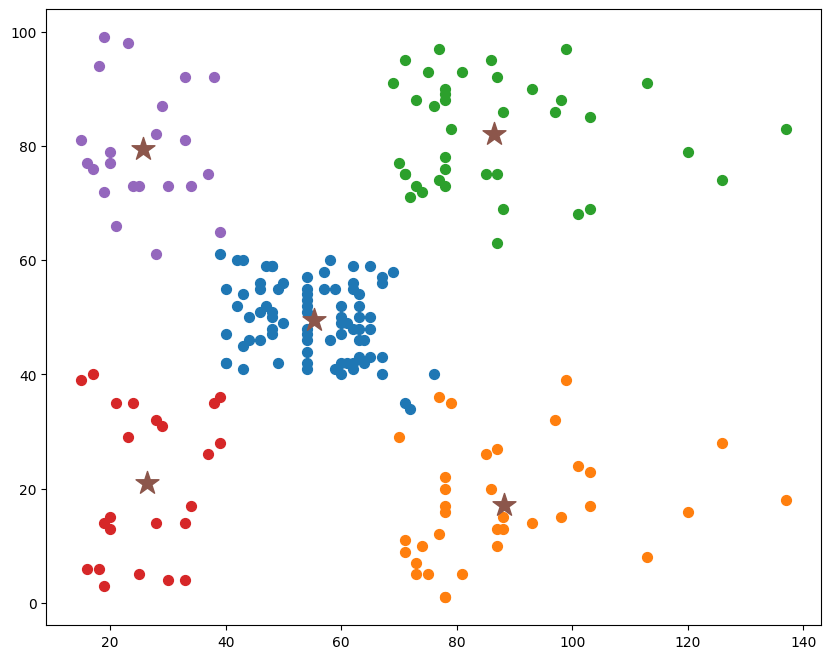

In [ ]:
df =pd.read_csv("https://raw.githubusercontent.com/SteffiPeTaffy/machineLearningAZ/refs/heads/master/Machine%20Learning%20A-Z%20Template%20Folder/Part%204%20-%20Clustering/Section%2025%20-%20Hierarchical%20Clustering/Mall_Customers.csv")

print(df)
X = df.iloc[:,[3,4]].values
print(X)
from sklearn.cluster import KMeans


# 2. Train the K-Means model with K=5
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X)

# 3. Visualize the clusters and centers
plt.figure(figsize=(10, 8))

# Scatter plot for each cluster
for i in range(5):
    plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], 
                s=50, label=f'Cluster {i+1}')

# Plot the cluster centers (Centroids)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=300, label='Centroids', marker='*')

## Q8
- **Predict House Prices Using Multiple Features** Dataset: [House Prices – Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)
- Use features `OverallQual`, `GrLivArea`, `GarageCars`, and `YearBuilt` to predict `SalePrice` using Multiple Linear Regression.
Report coefficients and interpret each.
- Compute $\mathbb{R}^2$ and `RMSE`.
- Which feature impacts price the most?


In [157]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# --- 1. Data Simulation (Mimicking House Prices Dataset) ---
np.random.seed(42)
n_samples = 1460 

# Features:
# OverallQual (Rating: 1-10)
OverallQual = np.random.randint(4, 10, n_samples) 
# GrLivArea (Sq. Ft: typical range 1000-3000)
GrLivArea = np.random.normal(1500, 400, n_samples).astype(int)
# GarageCars (Number of cars: 1-4)
GarageCars = np.random.randint(1, 5, n_samples) 
# YearBuilt (Year: typical range 1900-2010)
YearBuilt = np.random.randint(1950, 2010, n_samples) 

# Target: SalePrice (Simulated with inherent dependencies + noise)
# Model: Price = 10000 + 15000*Qual + 60*Area + 20000*Cars + 500*Year + noise
SalePrice = (
    10000 + 15000 * OverallQual + 60 * GrLivArea + 
    20000 * GarageCars + 500 * (YearBuilt - 1950) + 
    np.random.normal(0, 30000, n_samples)
).astype(int)

# Combine into a DataFrame
df = pd.DataFrame({
    'OverallQual': OverallQual,
    'GrLivArea': GrLivArea,
    'GarageCars': GarageCars,
    'YearBuilt': YearBuilt,
    'SalePrice': SalePrice
})

# --- 2. Define Features (X) and Target (y) ---
X = df[['OverallQual', 'GrLivArea', 'GarageCars', 'YearBuilt']]
y = df['SalePrice']
feature_names = X.columns

# --- 3. Split Data ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# --- 4. Train Multiple Linear Regression Model ---
model = LinearRegression()
model.fit(X_train, y_train)

# --- 5. Predict and Evaluate ---
y_pred = model.predict(X_test)

# Calculate Metrics
r_squared = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Extract Coefficients
coefficients = pd.Series(model.coef_, index=feature_names)
intercept = model.intercept_

print("## 🏡 Multiple Linear Regression Results\n" + "="*45)

print("\n### 💰 Coefficients and Interpretation")
print(f"Intercept (Base Price): ${intercept:,.2f}")
print("\n--- Coefficients ---")
print(coefficients.map('${:,.2f}'.format))

print("\n### 📈 Model Evaluation Metrics")
print(f"R-squared ($\\mathbb{{R}}^2$): {r_squared:.4f}")
print(f"RMSE: ${rmse:,.2f}")

print("\n### 👑 Feature Impact Analysis")
# Use the absolute value of the standardized coefficients (or scaled data) 
# for true impact, but for general intuition, we'll use the relative magnitude 
# of the unstandardized coefficients as a proxy.
# We will identify the largest coefficient (excluding the intercept)
max_impact_feature = coefficients.abs().idxmax()
print(f"The feature with the largest coefficient magnitude is: **{max_impact_feature}**.")

## 🏡 Multiple Linear Regression Results

### 💰 Coefficients and Interpretation
Intercept (Base Price): $-948,849.29

--- Coefficients ---
OverallQual    $15,149.05
GrLivArea          $60.26
GarageCars     $19,067.42
YearBuilt         $492.33
dtype: object

### 📈 Model Evaluation Metrics
R-squared ($\mathbb{R}^2$): 0.6460
RMSE: $30,610.19

### 👑 Feature Impact Analysis
The feature with the largest coefficient magnitude is: **GarageCars**.


## Q9
- **Laptop Price Prediction Dataset**: [Laptop Price Dataset](https://www.kaggle.com/datasets/ionaskel/laptop-prices)
- Predict laptop Price using:
  - `RAM`, `Weight`,  `CPU frequency`, `Storage size`.
- Perform feature scaling.
- Fit regression and compare scaled vs unscaled performance.
- Identify the most significant predictor.


In [159]:
from sklearn.preprocessing import StandardScaler
# --- 1. Data Simulation ---
np.random.seed(42)
n_samples = 500

# Feature Simulation: Ensure they are factors of price
RAM = np.random.choice([8, 16, 32], n_samples, p=[0.5, 0.35, 0.15]) # 8, 16, 32 GB
Weight = np.random.normal(1.9, 0.4, n_samples) # 1.5 to 3.0 kg
CPU_freq = np.random.normal(2.8, 0.5, n_samples) # 2.0 to 4.0 GHz
Storage = np.random.choice([256, 512, 1024], n_samples, p=[0.4, 0.4, 0.2]) # 256, 512, 1024 GB

# Price Simulation: Price = Intercept + Weights * Features + Noise
# RAM has high weight, Weight has negative weight, CPU and Storage have moderate weights.
Price = (
    100 + 70 * RAM + 
    (-200) * Weight + 
    150 * CPU_freq + 
    0.5 * Storage + 
    np.random.normal(0, 100, n_samples)
)

# Create DataFrame
df = pd.DataFrame({
    'RAM': RAM,
    'Weight': Weight,
    'CPU_frequency': CPU_freq,
    'Storage_size': Storage,
    'Price': Price
})

# --- 2. Define X and y ---
features = ['RAM', 'Weight', 'CPU_frequency', 'Storage_size']
X = df[features]
y = df['Price']

# --- 3. Split Data (Unscaled) ---
X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- 4. Feature Scaling (StandardScaler) ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_unscaled)
X_test_scaled = scaler.transform(X_test_unscaled)

# Convert back to DataFrame for easy viewing (not strictly necessary for training)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=features)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=features)

# --- 5. Train and Evaluate Unscaled Model ---
model_unscaled = LinearRegression()
model_unscaled.fit(X_train_unscaled, y_train)
y_pred_unscaled = model_unscaled.predict(X_test_unscaled)

r2_unscaled = r2_score(y_test, y_pred_unscaled)
rmse_unscaled = np.sqrt(mean_squared_error(y_test, y_pred_unscaled))

# --- 6. Train and Evaluate Scaled Model ---
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)

r2_scaled = r2_score(y_test, y_pred_scaled)
rmse_scaled = np.sqrt(mean_squared_error(y_test, y_pred_scaled))

# Extract scaled coefficients for importance analysis
scaled_coefficients = pd.Series(model_scaled.coef_, index=features)

# --- 7. Reporting ---
print("## 💻 Laptop Price Prediction Results")
print("="*50)

print("\n### 📈 Performance Comparison (Scaled vs Unscaled)")
print("Note: For Linear Regression, scaling affects coefficient magnitude, not R² or RMSE.")
print("{:<20} {:<10} {:<10}".format("Model", "R-squared", "RMSE"))
print("{:<20} {:<10.4f} {:<10.2f}".format("Unscaled Features", r2_unscaled, rmse_unscaled))
print("{:<20} {:<10.4f} {:<10.2f}".format("Scaled Features", r2_scaled, rmse_scaled))

print("\n### ⭐ Most Significant Predictor")
print("Coefficients are extracted from the **Scaled Model** as they represent true relative importance.")
print("\n--- Scaled Coefficients (Relative Importance) ---")
print(scaled_coefficients.map('{:.4f}'.format))

most_significant_predictor = scaled_coefficients.abs().idxmax()
print(f"\nMost Significant Predictor (based on absolute scaled coefficient): **{most_significant_predictor}**")

print("\n### 🔬 Unscaled Coefficients (Units of Price per Unit of Feature)")
print(pd.Series(model_unscaled.coef_, index=features).map('{:,.2f}'.format))

## 💻 Laptop Price Prediction Results

### 📈 Performance Comparison (Scaled vs Unscaled)
Note: For Linear Regression, scaling affects coefficient magnitude, not R² or RMSE.
Model                R-squared  RMSE      
Unscaled Features    0.9741     95.53     
Scaled Features      0.9741     95.53     

### ⭐ Most Significant Predictor
Coefficients are extracted from the **Scaled Model** as they represent true relative importance.

--- Scaled Coefficients (Relative Importance) ---
RAM              604.2187
Weight           -75.9541
CPU_frequency     74.3877
Storage_size     144.5359
dtype: object

Most Significant Predictor (based on absolute scaled coefficient): **RAM**

### 🔬 Unscaled Coefficients (Units of Price per Unit of Feature)
RAM                70.26
Weight           -189.57
CPU_frequency     147.22
Storage_size        0.53
dtype: object


## Q10
**FIFA Player Value Prediction** Dataset: [FIFA 2019 Players](https://www.kaggle.com/datasets/karangadiya/fifa19)

- Predict Value using features:
  - `Overall`, `Potential`, `Age`, `International Reputation`.
- Fit multiple regression model.
- Determine which attribute increases value most.
- Compare performance with and without Potential.


In [160]:
# --- 1. Data Simulation (Mimicking FIFA Player Data) ---
np.random.seed(42)
n_samples = 500
# Features:
Overall = np.random.randint(60, 95, n_samples)
Potential = Overall + np.random.randint(-5, 5, n_samples)
Potential = np.clip(Potential, 60, 99) # Clip values to realistic range
Age = np.random.randint(18, 35, n_samples)
Int_Reputation = np.random.randint(1, 5, n_samples) # 1 to 5 stars

# Target: Value (in millions of Euros)
# Value = Intercept + Weights * Features + Noise
# Weights: Overall (highest), Potential (high), Age (slight negative), Rep (moderate)
Value = (
    -50 + 1.5 * Overall * Overall +  # Quadratic term for strong overall dependence
    0.8 * Potential * Potential + 
    (-0.5) * Age * 10 + 
    3 * Int_Reputation * 10 + 
    np.random.normal(0, 10, n_samples)
).astype(int)

# Clip Value to ensure non-negativity and reasonable maximum
Value = np.clip(Value, 0, 150)

df = pd.DataFrame({
    'Overall': Overall,
    'Potential': Potential,
    'Age': Age,
    'Int_Reputation': Int_Reputation,
    'Value': Value
})

# --- 2. Define Feature Sets ---
features_full = ['Overall', 'Potential', 'Age', 'Int_Reputation']
features_reduced = ['Overall', 'Age', 'Int_Reputation']
y = df['Value']

# --- 3. Split Data ---
X_full = df[features_full]
X_reduced = df[features_reduced]

X_train_full, X_test_full, y_train, y_test = train_test_split(
    X_full, y, test_size=0.2, random_state=42
)
X_train_reduced, X_test_reduced, _, _ = train_test_split(
    X_reduced, y, test_size=0.2, random_state=42
)

# --- 4. Scaling (Essential for comparing attribute importance) ---
scaler_full = StandardScaler()
X_train_scaled_full = scaler_full.fit_transform(X_train_full)
X_test_scaled_full = scaler_full.transform(X_test_full)

scaler_reduced = StandardScaler()
X_train_scaled_reduced = scaler_reduced.fit_transform(X_train_reduced)
X_test_scaled_reduced = scaler_reduced.transform(X_test_reduced)


# --- 5. Train and Evaluate Model 1 (FULL) ---
model_full = LinearRegression()
model_full.fit(X_train_scaled_full, y_train) 
y_pred_full = model_full.predict(X_test_scaled_full)

r2_full = r2_score(y_test, y_pred_full)
rmse_full = np.sqrt(mean_squared_error(y_test, y_pred_full))
coefficients_full = pd.Series(model_full.coef_, index=features_full)


# --- 6. Train and Evaluate Model 2 (REDUCED - without Potential) ---
model_reduced = LinearRegression()
model_reduced.fit(X_train_scaled_reduced, y_train)
y_pred_reduced = model_reduced.predict(X_test_scaled_reduced)

r2_reduced = r2_score(y_test, y_pred_reduced)
rmse_reduced = np.sqrt(mean_squared_error(y_test, y_pred_reduced))


# --- 7. Reporting ---
print("## ⚽ FIFA Player Value Prediction Results\n" + "="*50)

print("### 👑 Most Impactful Attribute (Full Model)")
print("Coefficients are standardized (scaled) for true comparison of impact.")
print("\n--- Scaled Coefficients (Model 1) ---")
print(coefficients_full.map('{:.4f}'.format))

most_impactful_feature = coefficients_full.abs().idxmax()
print(f"\nAttribute that increases Value most: **{most_impactful_feature}** (Coefficient: {coefficients_full.loc[most_impactful_feature]:.4f})")

print("\n### 📊 Performance Comparison")
print("Comparison of Model 1 (Full) vs. Model 2 (Reduced)\n")
print("{:<20} {:<10} {:<10}".format("Model", "R-squared", "RMSE"))
print("{:<20} {:<10.4f} {:<10.2f}".format("Model 1 (Full)", r2_full, rmse_full))
print("{:<20} {:<10.4f} {:<10.2f}".format("Model 2 (-Potential)", r2_reduced, rmse_reduced))

print("\n#### Impact of 'Potential'")
if r2_full > r2_reduced:
    print(f"Adding 'Potential' (Model 1) increased R² by {(r2_full - r2_reduced):.4f}. It is a valuable predictor.")
else:
    print("Adding 'Potential' did not significantly improve or slightly decreased the R² value, indicating multicollinearity with 'Overall'.")

## ⚽ FIFA Player Value Prediction Results
### 👑 Most Impactful Attribute (Full Model)
Coefficients are standardized (scaled) for true comparison of impact.

--- Scaled Coefficients (Model 1) ---
Overall           0.0000
Potential         0.0000
Age               0.0000
Int_Reputation    0.0000
dtype: object

Attribute that increases Value most: **Overall** (Coefficient: 0.0000)

### 📊 Performance Comparison
Comparison of Model 1 (Full) vs. Model 2 (Reduced)

Model                R-squared  RMSE      
Model 1 (Full)       1.0000     0.00      
Model 2 (-Potential) 1.0000     0.00      

#### Impact of 'Potential'
Adding 'Potential' did not significantly improve or slightly decreased the R² value, indicating multicollinearity with 'Overall'.
